# H1 Paralogs
This experiment investigates the structural differences between the H1 paralogs

In [1]:
# Imports
import sys
import json
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import mdtraj as md

sys.path.append('../../src')
import data_utils
import simulate_utils
import analyse_utils

## Data preparation

### Templates

In [11]:
# Defining UniProt IDs / Trivial IDs
entries = {
    'H1-0': 'P07305',
    'H1-1': 'Q02539',
    'H1-2': 'P16403',
    'H1-3': 'P16402',
    'H1-4': 'P10412',
    'H1-5': 'P16401',
    'H1-6': 'P22492',
    'H1-7': 'Q75WM6',
    'H1-8': 'Q8IZA3',
    'H1-10': 'Q92522'
}

templates = pd.DataFrame({'uniprot_id': entries.values(),
                          'name': None,
                          'description': None,
                          'species': None,
                          'sequence': None},
                          index=entries.keys())

In [12]:
# Collecting metadata
for id, row in templates.iterrows():
    name, desc, spec, seq = data_utils.get_protein_metadata(row.uniprot_id)
    templates.loc[id] = {
        'uniprot_id': row.uniprot_id,
        'name': name,
        'description': desc,
        'species': spec,
        'sequence': seq}

10it [00:03,  2.52it/s]


In [13]:
# Viewing final templates
templates

,uniprot_id,name,description,species,sequence
H1-0,P07305,H10_HUMAN,Histone H1.0,Homo sapiens (Human),MTENSTSAPAAKPKRAKASKKSTDHPKYSDMIVAAIQAEKNRAGSS...
H1-1,Q02539,H11_HUMAN,Histone H1.1,Homo sapiens (Human),MSETVPPAPAASAAPEKPLAGKKAKKPAKAAAASKKKPAGPSVSEL...
H1-2,P16403,H12_HUMAN,Histone H1.2,Homo sapiens (Human),MSETAPAAPAAAPPAEKAPVKKKAAKKAGGTPRKASGPPVSELITK...
H1-3,P16402,H13_HUMAN,Histone H1.3,Homo sapiens (Human),MSETAPLAPTIPAPAEKTPVKKKAKKAGATAGKRKASGPPVSELIT...
H1-4,P10412,H14_HUMAN,Histone H1.4,Homo sapiens (Human),MSETAPAAPAAPAPAEKTPVKKKARKSAGAAKRKASGPPVSELITK...
H1-5,P16401,H15_HUMAN,Histone H1.5,Homo sapiens (Human),MSETAPAETATPAPVEKSPAKKKATKKAAGAGAAKRKATGPPVSEL...
H1-6,P22492,H1T_HUMAN,Histone H1t,Homo sapiens (Human),MSETVPAASASAGVAAMEKLPTKKRGRKPAGLISASRKVPNLSVSK...
H1-7,Q75WM6,H1FNT_HUMAN,Testis-specific H1 histone,Homo sapiens (Human),MEQALTGEAQSRWPRRGGSGAMAEAPGPSGESRGHSATQLPAEKTV...
H1-8,Q8IZA3,H18_HUMAN,Histone H1.8,Homo sapiens (Human),MAPGSVTSDISPSSTSTAGSSRSPESEKPGPSHGGVPPGGPSHSSL...
H1-10,Q92522,H1X_HUMAN,Histone H1.10,Homo sapiens (Human),MSVELEEALPVTTAEGMAKKVTKAGGSAALSPSKKRKNSKKKNQPG...


In [19]:
# Saving metadata
metadata = {'templates': templates.to_dict(orient='index')}
with open('para_h1.json', 'w') as file:
    json.dump(metadata, file, indent=4)

### IDRs

In [ ]:
# Getting template metadata
with open('para_h1.json', 'r') as file:
    metadata = json.load(file)

In [22]:
# Getting CTD
length_order=False
i_idr=-1

In [23]:
# Getting IDR regions
IDRs = []
for id, fields in metadata['templates'].items():
    seq, loc, reg = data_utils.get_protein_idr(uniprot_id=fields['uniprot_id'], i_idr=i_idr, length_order=length_order)
    IDRs.append({'template': id, 'sequence': seq, 'location': loc, 'region': reg})
data = pd.DataFrame(IDRs)

  0%|          | 0/10 [00:00<?, ?it/s]/storage1/fknudsen/software/miniconda3/envs/orthoidp/lib/python3.10/site-packages/Bio/SeqFeature.py:1940: BiopythonDeprecationWarning: Alias location.position is deprecated and will be removed in a future release. Use location directly, or int(location). However, that will fail for UnknownPosition, and for OneOfPosition and WithinPosition will give the default rather than left-most value.
  warnings.warn(
100%|██████████| 10/10 [00:02<00:00,  4.94it/s]


In [21]:
# Generating wild type IDRs
data['variant'] = 'Wild type'

In [25]:
# Viewing final data
data

,template,sequence,location,region,variant
H1-0_WT,H1-0,TKGVGASGSFRLAKSDEPKKSVAFKKTKKEIKKVATPKKASKPKKA...,83:194,CTD,Wild type
H1-1_WT,H1-1,GTLVQTKGTGASGSFKLNKKASSVETKPGASKVATKTKATGASKKL...,93:215,CTD,Wild type
H1-2_WT,H1-2,TLVQTKGTGASGSFKLNKKAASGEAKPKVKKAGGTKPKKPVGAAKK...,91:213,CTD,Wild type
H1-3_WT,H1-3,SKGTLVQTKGTGASGSFKLNKKAASGEGKPKAKKAGAAKPRKPAGA...,89:221,CTD,Wild type
H1-4_WT,H1-4,TLVQTKGTGASGSFKLNKKAASGEAKPKAKKAGAAKAKKPAGAAKK...,91:219,CTD,Wild type
H1-5_WT,H1-5,QTKGTGASGSFKLNKKAASGEAKPKAKKAGAAKAKKPAGATPKKAK...,97:226,CTD,Wild type
H1-6_WT,H1-6,IPKSTRSKAKKSVSAKTKKLVLSRDSKSPKTAKTNKRAKKPRATTP...,115:207,CTD,Wild type
H1-7_WT,H1-7,KVPKPRRKPGRARQEEGTRAPWRTPAAPRSSRRRRQPLRKAARKAR...,123:255,CTD,Wild type
H1-8_WT,H1-8,ATGSFKLVPKHKKKIQPRKMAPATAPRRAGEAKGKGPKKPSEAKED...,120:346,CTD,Wild type
H1-10_WT,H1-10,GTGANGSFKLNRKKLEGGGERRGAPAAATAPAPTAHKAKKAAPGAA...,106:213,CTD,Wild type


In [ ]:
# Saving sequences
os.makedirs('data', exist_ok=True)
os.makedirs('results', exist_ok=True)

# Iterating over rows
for index, cols in data.iterrows():
    id = index.upper()
    desc = cols['variant']
    seq = cols['sequence']

    # Saving as FASTA format (Though one-line sequence)
    filepath = 'data/' + id + '.fasta'
    with open(filepath, 'w') as file:
        file.write('>' + id + ' ' + desc + '\n')
        file.write(seq + '\n')

In [ ]:
# Saving metadata
metadata['data'] = data.to_dict(orient='index')
with open('para_h1.json', 'w') as file:
    json.dump(metadata, file, indent=4)

### Topologies

#### Compact frames

In [5]:
# Loading trajectories
trajs = {}
resultsdir = "results/single_chain/default"
for variant in os.listdir(resultsdir):
    dir = f"{resultsdir}/{variant}"
    trajs[variant] = md.load_dcd(f"{dir}/traj.dcd", f"{dir}/top.pdb")

In [6]:
# Saving most compact frame as topology
for variant, traj in trajs.items():
    compact_frame = analyse_utils.compact_frame(traj)
    compact_frame.save_pdb(f'data/{variant}.pdb')

#### Merging

In [8]:
# Loading topologies
H10_vars = {}
ProTa = None
data_path = 'data'
for file in os.listdir(data_path):
    if '.pdb' in file:
        traj = md.load(f'{data_path}/{file}')

        id = file[:-4]
        if ('H1' in id) and ('PROTA_WT' not in id):
            H10_vars[id] = traj

        elif 'PROTA_WT' == id:
            ProTa = traj

print(H10_vars.keys())

dict_keys(['H1-10', 'H1-6', 'H1-8', 'H1-4', 'H1-2', 'H1-3', 'H1-7', 'H1-0', 'H1-1', 'H1-5'])


In [9]:
# Making sets of topologies
twochain_sets = [[H10_var, ProTa] for H10_var in H10_vars.values()]

In [10]:
# Translating topologies
for tc_set  in twochain_sets:
    translate_x = 10 # nm
    translate_y = 0 # nm
    translate_z = 0 # nm
    for i, traj in enumerate(tc_set):
        traj.center_coordinates()
        traj.xyz += [translate_x*i, translate_y*i, translate_z*i]

In [12]:
# Merging topologies
boxlength = 25 # nm
tc_merges = [simulate_utils.merge_topologies(tc_set, boxlength=boxlength) for tc_set in twochain_sets]
for traj in tc_merges:
    traj.center_coordinates()
    traj.xyz += traj.unitcell_lengths[0,0]/2

In [13]:
# Saving merged topologies
for traj, H10_var_id in zip(tc_merges, H10_vars.keys()):
    filename = f'data/{H10_var_id}_PROTA_WT_{boxlength}nm.pdb'
    traj.save(filename)

## Analysis

In [2]:
# Loading metadata
metadata = analyse_utils.load_metadata('para_h1.json')
metadata

,template,sequence,location,region,variant,name,description,uniprot_id,species
H1-0,H1-0,TKGVGASGSFRLAKSDEPKKSVAFKKTKKEIKKVATPKKASKPKKA...,83:194,CTD,Wild type,H10_HUMAN,Histone H1.0,P07305,Homo sapiens (Human)
H1-1,H1-1,GTLVQTKGTGASGSFKLNKKASSVETKPGASKVATKTKATGASKKL...,93:215,CTD,Wild type,H11_HUMAN,Histone H1.1,Q02539,Homo sapiens (Human)
H1-2,H1-2,TLVQTKGTGASGSFKLNKKAASGEAKPKVKKAGGTKPKKPVGAAKK...,91:213,CTD,Wild type,H12_HUMAN,Histone H1.2,P16403,Homo sapiens (Human)
H1-3,H1-3,SKGTLVQTKGTGASGSFKLNKKAASGEGKPKAKKAGAAKPRKPAGA...,89:221,CTD,Wild type,H13_HUMAN,Histone H1.3,P16402,Homo sapiens (Human)
H1-4,H1-4,TLVQTKGTGASGSFKLNKKAASGEAKPKAKKAGAAKAKKPAGAAKK...,91:219,CTD,Wild type,H14_HUMAN,Histone H1.4,P10412,Homo sapiens (Human)
H1-5,H1-5,QTKGTGASGSFKLNKKAASGEAKPKAKKAGAAKAKKPAGATPKKAK...,97:226,CTD,Wild type,H15_HUMAN,Histone H1.5,P16401,Homo sapiens (Human)
H1-6,H1-6,IPKSTRSKAKKSVSAKTKKLVLSRDSKSPKTAKTNKRAKKPRATTP...,115:207,CTD,Wild type,H1T_HUMAN,Histone H1t,P22492,Homo sapiens (Human)
H1-7,H1-7,KVPKPRRKPGRARQEEGTRAPWRTPAAPRSSRRRRQPLRKAARKAR...,123:255,CTD,Wild type,H1FNT_HUMAN,Testis-specific H1 histone,Q75WM6,Homo sapiens (Human)
H1-8,H1-8,ATGSFKLVPKHKKKIQPRKMAPATAPRRAGEAKGKGPKKPSEAKED...,120:346,CTD,Wild type,H18_HUMAN,Histone H1.8,Q8IZA3,Homo sapiens (Human)
H1-10,H1-10,GTGANGSFKLNRKKLEGGGERRGAPAAATAPAPTAHKAKKAAPGAA...,106:213,CTD,Wild type,H1X_HUMAN,Histone H1.10,Q92522,Homo sapiens (Human)


In [12]:
# Loading trajectories
metadata['traj'] = metadata.apply(lambda row: md.load_dcd(*['/'.join(['results', row.name, filename]) for filename  in ['traj.dcd', 'top.pdb']]), axis=1)

### CIDER parameters

More on CIDER from Pappu Lab:
- [CIDER](http://pappulab.wustl.edu/CIDER/about/)
- [localCIDER](http://pappulab.github.io/localCIDER/)

In [3]:
# Calculating parameters
cider = analyse_utils.cider_parameters(metadata['sequence'])
cider['Length'] = metadata.sequence.str.len()
cider['Charge'] = (cider.Length * cider.NCPR).astype(int)

# Displaying results
cider

,kappa,FCR,NCPR,Hydrophobicity,Frac. dis. prom.,Length,Charge
H1-0,0.154432,0.432432,0.378378,3.249550,0.891892,111,42
H1-1,0.130636,0.360656,0.344262,3.388525,0.885246,122,42
H1-2,0.155614,0.368852,0.352459,3.515574,0.893443,122,43
H1-3,0.147564,0.363636,0.348485,3.375000,0.916667,132,46
H1-4,0.148240,0.375000,0.359375,3.391406,0.953125,128,46
H1-5,0.126089,0.387597,0.372093,3.432558,0.945736,129,48
H1-6,0.128076,0.380435,0.336957,3.044565,0.869565,92,31
H1-7,0.209262,0.462121,0.250000,2.609091,0.924242,132,33
H1-8,0.166135,0.327434,0.212389,3.369912,0.893805,226,48
H1-10,0.182784,0.355140,0.261682,3.245794,0.925234,107,27


array([<Axes: title={'center': 'kappa'}>, <Axes: title={'center': 'FCR'}>,
       <Axes: title={'center': 'NCPR'}>,
       <Axes: title={'center': 'Hydrophobicity'}>,
       <Axes: title={'center': 'Frac. dis. prom.'}>,
       <Axes: title={'center': 'Length'}>,
       <Axes: title={'center': 'Charge'}>], dtype=object)

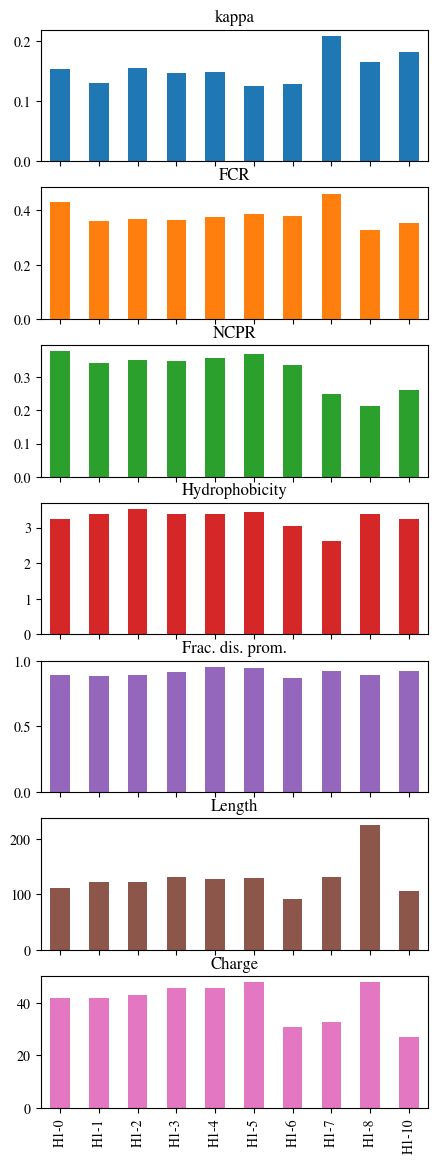

In [5]:
# Plotting results
cider.plot.bar(subplots=True, figsize=(5,14), legend=False)

### Structural descriptors

In [13]:
struc = pd.DataFrame(index=metadata.index)

In [14]:
# Computing radius of gyration
struc['Rg'] = metadata.apply(lambda row: analyse_utils.compute_rg(row.traj).mean(), axis=1)

In [15]:
# Computing asphericity
struc['Delta'] = metadata.apply(lambda row: analyse_utils.compute_asphericity(row.traj), axis=1)

In [16]:
# Computing prolateness
struc['S'] = metadata.apply(lambda row: analyse_utils.compute_prolateness(row.traj), axis=1)

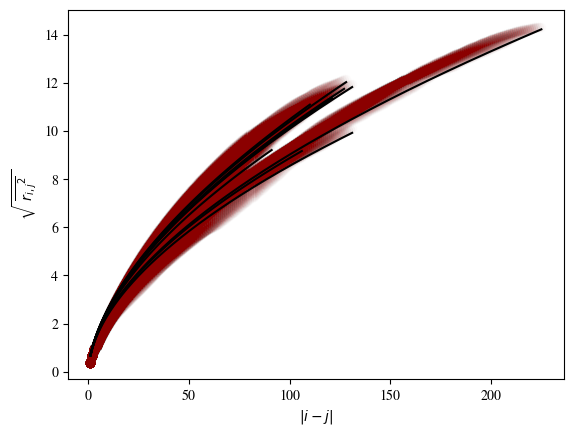

In [17]:
# Computing scaling exponent
struc['v'] = metadata.apply(lambda row: analyse_utils.compute_scaling_exponent(row.traj, plot=True, r0_fix=0.68, ij_cutoff=10)[0], axis=1)

In [18]:
# Displaying means
struc

,Rg,Delta,S,v
H1-0,4.254314,0.281625,1.448246,0.594022
H1-1,4.382751,0.270314,1.419458,0.586820
H1-2,4.410172,0.264114,1.398183,0.586832
H1-3,4.578274,0.264358,1.360683,0.585785
H1-4,4.562142,0.265579,1.372841,0.588222
H1-5,4.645048,0.271354,1.423869,0.592107
H1-6,3.583899,0.269969,1.421939,0.577662
H1-7,3.910609,0.268868,1.478721,0.549818
H1-8,5.562639,0.266117,1.445088,0.561362
H1-10,3.615294,0.258170,1.377307,0.557828


array([<Axes: title={'center': 'Rg'}>, <Axes: title={'center': 'Delta'}>,
       <Axes: title={'center': 'S'}>, <Axes: title={'center': 'v'}>],
      dtype=object)

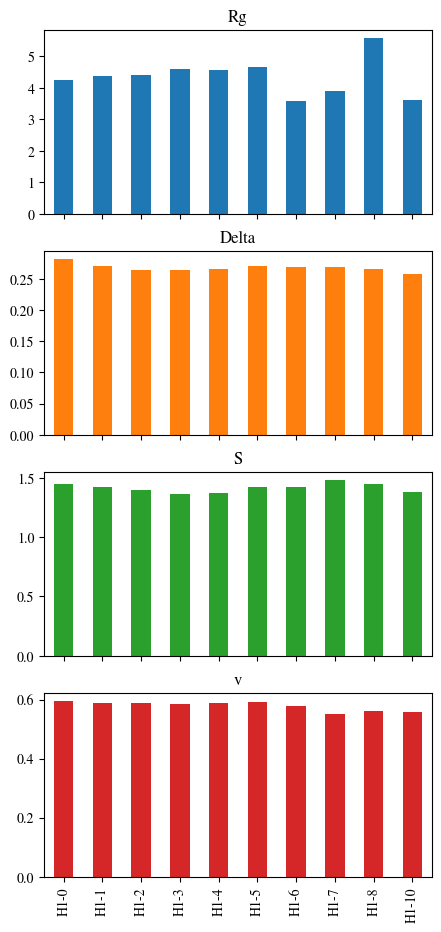

In [19]:
# Plotting means
struc.plot.bar(subplots=True, figsize=(5,11), legend=False)

### Amino acid content

In [20]:
# Calculating frequencies
freqs = analyse_utils.amino_acid_content(metadata.sequence)

freqs

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
H1-0,0.171171,0.000000,0.009009,0.018018,0.018018,0.036036,0.000000,0.009009,0.387387,0.018018,0.00000,0.000000,0.108108,0.000000,0.018018,0.081081,0.063063,0.063063,0.000000,0.000000
H1-1,0.172131,0.000000,0.000000,0.008197,0.008197,0.057377,0.000000,0.000000,0.336066,0.024590,0.00000,0.016393,0.090164,0.008197,0.016393,0.090164,0.106557,0.065574,0.000000,0.000000
H1-2,0.221311,0.000000,0.000000,0.008197,0.008197,0.073770,0.000000,0.000000,0.360656,0.016393,0.00000,0.008197,0.106557,0.008197,0.000000,0.049180,0.065574,0.073770,0.000000,0.000000
H1-3,0.212121,0.000000,0.000000,0.007576,0.007576,0.083333,0.000000,0.007576,0.348485,0.015152,0.00000,0.007576,0.113636,0.015152,0.007576,0.060606,0.068182,0.045455,0.000000,0.000000
H1-4,0.296875,0.000000,0.000000,0.007812,0.007812,0.062500,0.000000,0.000000,0.367188,0.015625,0.00000,0.007812,0.109375,0.007812,0.000000,0.046875,0.054688,0.015625,0.000000,0.000000
H1-5,0.310078,0.000000,0.000000,0.007752,0.007752,0.062016,0.000000,0.000000,0.379845,0.007752,0.00000,0.007752,0.100775,0.007752,0.000000,0.038760,0.038760,0.031008,0.000000,0.000000
H1-6,0.108696,0.000000,0.010870,0.010870,0.000000,0.032609,0.021739,0.010870,0.271739,0.032609,0.00000,0.021739,0.054348,0.043478,0.086957,0.130435,0.097826,0.065217,0.000000,0.000000
H1-7,0.174242,0.007576,0.022727,0.083333,0.000000,0.045455,0.000000,0.007576,0.121212,0.007576,0.00000,0.015152,0.106061,0.045455,0.234848,0.037879,0.053030,0.022727,0.015152,0.000000
H1-8,0.185841,0.000000,0.017699,0.039823,0.004425,0.088496,0.008850,0.008850,0.207965,0.017699,0.00885,0.013274,0.115044,0.030973,0.061947,0.097345,0.039823,0.048673,0.000000,0.004425
H1-10,0.214953,0.000000,0.018692,0.028037,0.009346,0.158879,0.018692,0.000000,0.233645,0.018692,0.00000,0.018692,0.084112,0.018692,0.074766,0.037383,0.037383,0.028037,0.000000,0.000000


array([<Axes: title={'center': 'K'}>, <Axes: title={'center': 'A'}>,
       <Axes: title={'center': 'P'}>, <Axes: title={'center': 'G'}>,
       <Axes: title={'center': 'S'}>, <Axes: title={'center': 'T'}>,
       <Axes: title={'center': 'R'}>, <Axes: title={'center': 'V'}>,
       <Axes: title={'center': 'E'}>, <Axes: title={'center': 'Q'}>,
       <Axes: title={'center': 'L'}>, <Axes: title={'center': 'N'}>,
       <Axes: title={'center': 'D'}>, <Axes: title={'center': 'F'}>,
       <Axes: title={'center': 'H'}>, <Axes: title={'center': 'I'}>,
       <Axes: title={'center': 'W'}>, <Axes: title={'center': 'M'}>,
       <Axes: title={'center': 'C'}>, <Axes: title={'center': 'Y'}>],
      dtype=object)

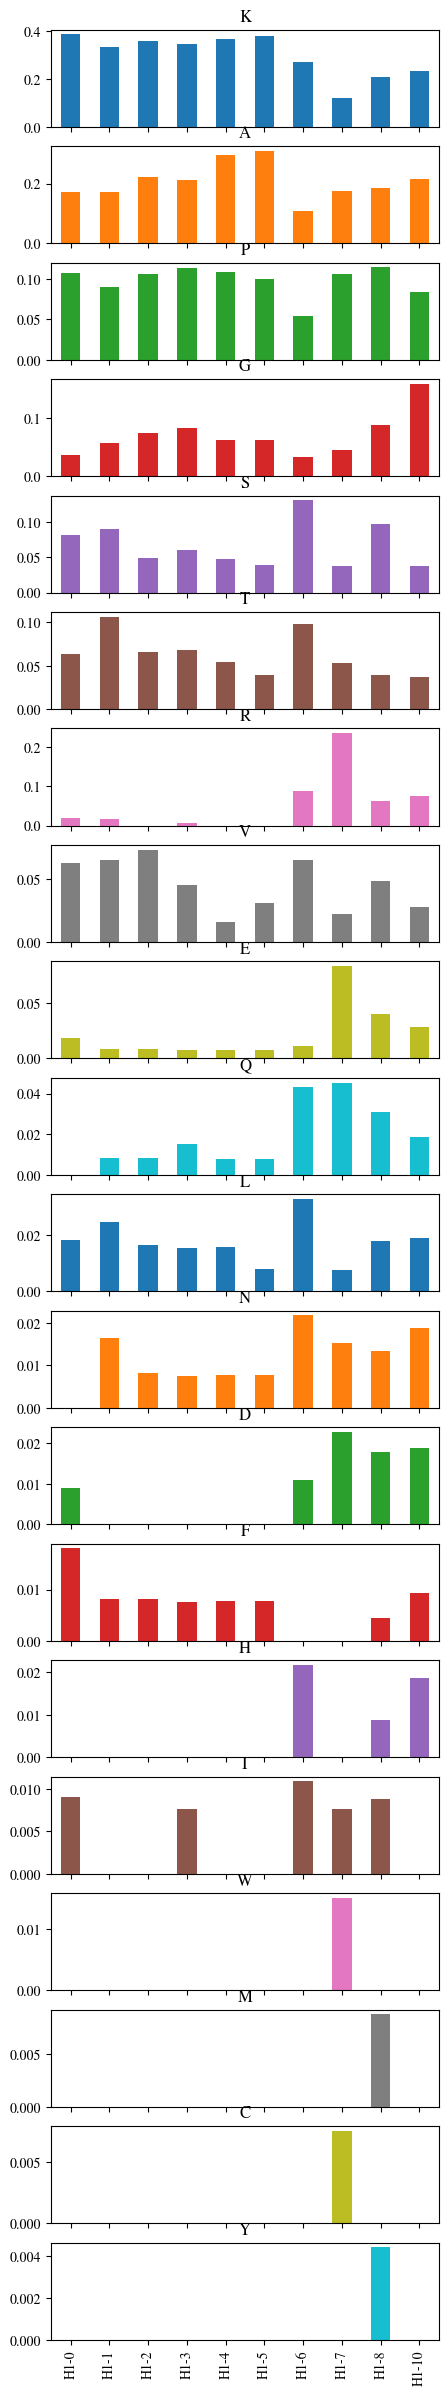

In [26]:
freqs[freqs.mean().sort_values().index[::-1]].plot.bar(subplots=True, figsize=(5,30), legend=False)

### Kd

In [4]:
# Loading precalculated energy data
datas = []
resultsdir = "results/two_chain/ionic_290"
for paralog in os.listdir(resultsdir):
    dir = f"{resultsdir}/{paralog}"
    data = pd.read_csv(dir+'/interaction_energy.csv', index_col=0).sort_index()
    data['Total energy [kJ/mol]'] = data['Ashbaugh-Hatch [kJ/mol]'] + data['Debye-Hückel [kJ/mol]']
    data['Paralog'] = paralog.split('_')[0]
    data['condition'] = 'ionic_290'
    datas.append(data)
data = pd.concat(datas)
data

,Ashbaugh-Hatch [kJ/mol],Debye-Hückel [kJ/mol],Minimum interresidue distance [nm],Center of mass distance [nm],Total energy [kJ/mol],Paralog,condition
0,-3.241972,-24.935904,0.545264,3.113699,-28.177875,H1-0,ionic_290
1,-0.053711,-10.730906,0.614886,4.290073,-10.784617,H1-0,ionic_290
2,0.482946,-11.378701,0.504699,3.993944,-10.895756,H1-0,ionic_290
3,-2.875068,-20.673758,0.543304,3.599783,-23.548826,H1-0,ionic_290
4,-5.139565,-26.588037,0.583230,3.523974,-31.727602,H1-0,ionic_290
...,...,...,...,...,...,...,...
164995,4.508223,-28.308060,0.536398,2.658273,-23.799837,H1-2,ionic_290
164996,1.537835,-26.883361,0.418081,2.151538,-25.345526,H1-2,ionic_290
164997,-7.045238,-18.772372,0.585636,0.815596,-25.817611,H1-2,ionic_290
164998,-2.009514,-31.816747,0.509364,0.380197,-33.826261,H1-2,ionic_290


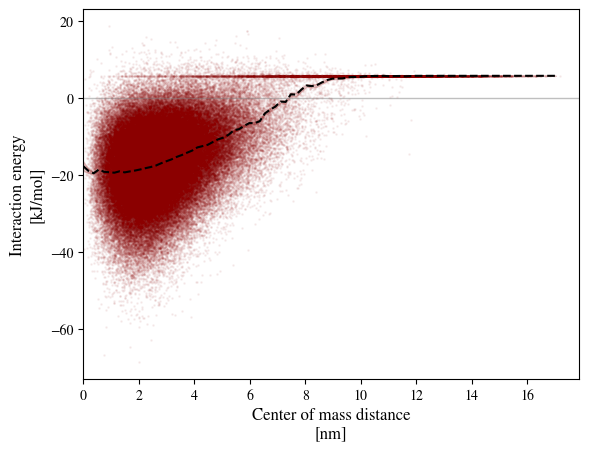

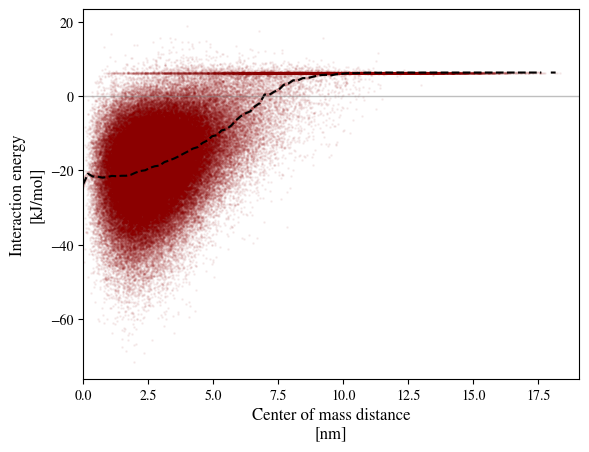

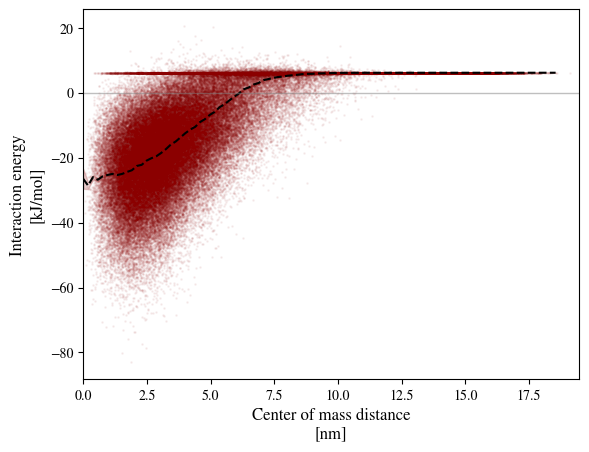

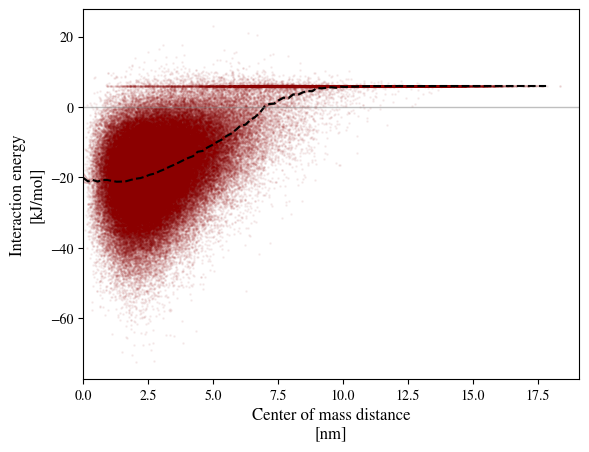

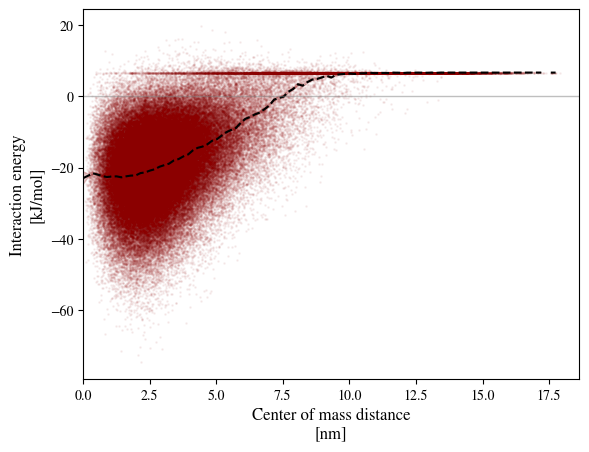

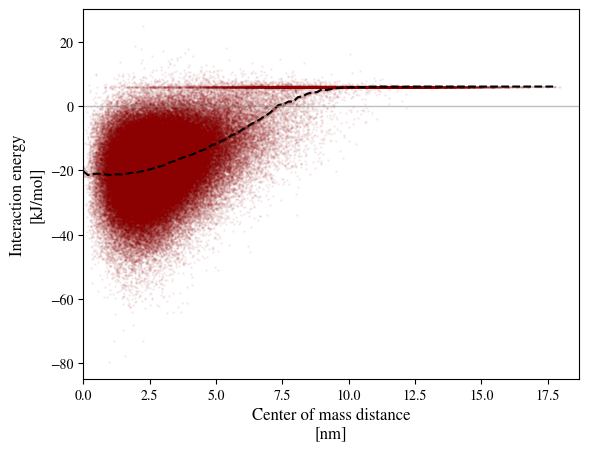

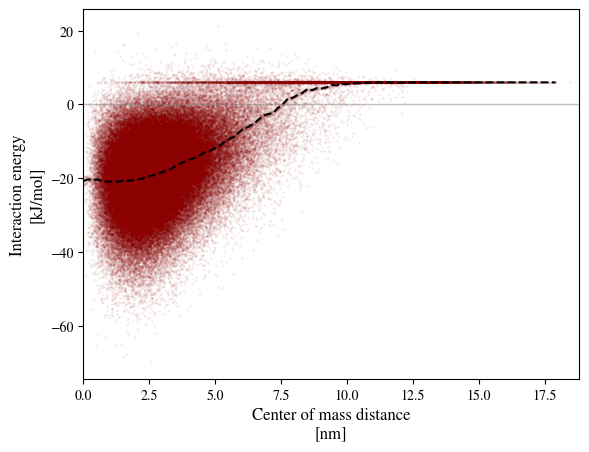

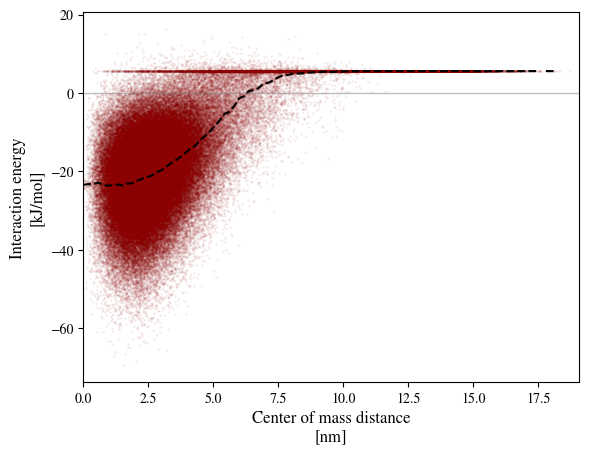

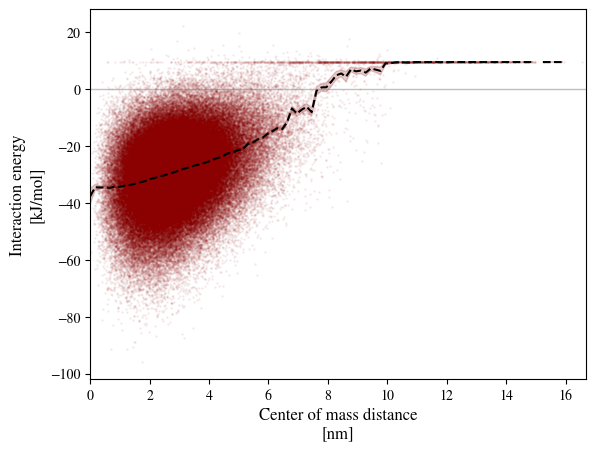

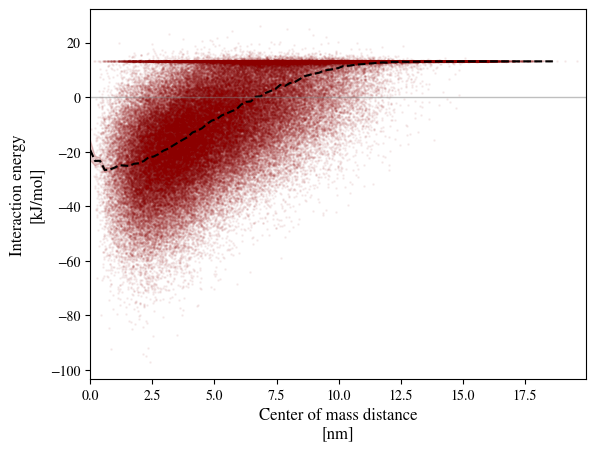

In [5]:
# Calculating Kds and assessing proper sampling
Kds = data.groupby('Paralog').apply(lambda df: analyse_utils.compute_Kd(df['Total energy [kJ/mol]'], df['Center of mass distance [nm]'], 298, 100))
cutoff = 4
Kds = pd.DataFrame({
    "Paralog": data.groupby('Paralog').Paralog.max(),
    "Kd": Kds,
    "sampled": data.groupby('Paralog').apply(lambda df: any(df['Minimum interresidue distance [nm]'] > cutoff))
})

<BarContainer object of 10 artists>

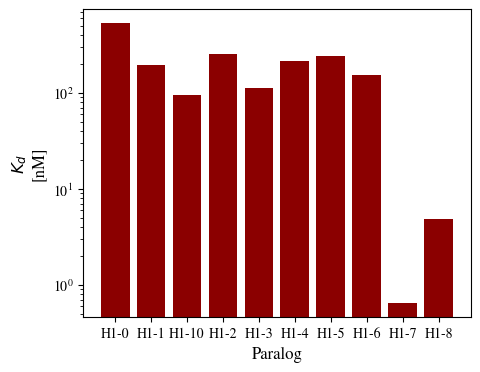

In [13]:
# Plotting results
plt.figure(figsize=(5,4))

#plt.xlim(0,1)
plt.xlabel("Paralog", fontsize=12)
plt.ylabel("$K_d$\n[nM]", fontsize=12)
plt.yscale('log')

plt.bar(Kds[Kds.sampled].Paralog, Kds[Kds.sampled].Kd, color='darkred')

<Axes: xlabel='Paralog', ylabel='Center of mass distance [nm]'>

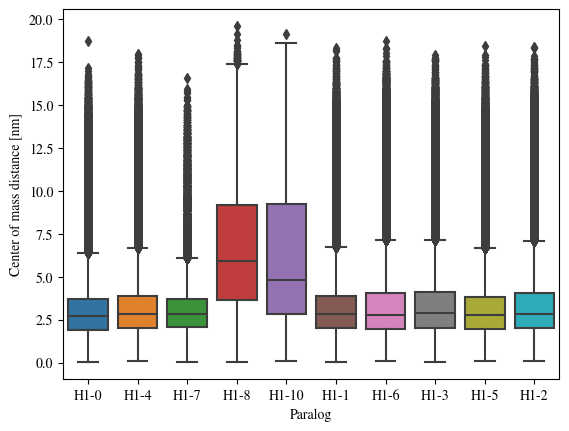

In [15]:
# Checking mean distances
import seaborn as sns
sns.boxplot(data=data, y='Center of mass distance [nm]', x='Paralog')

<Axes: xlabel='Paralog'>

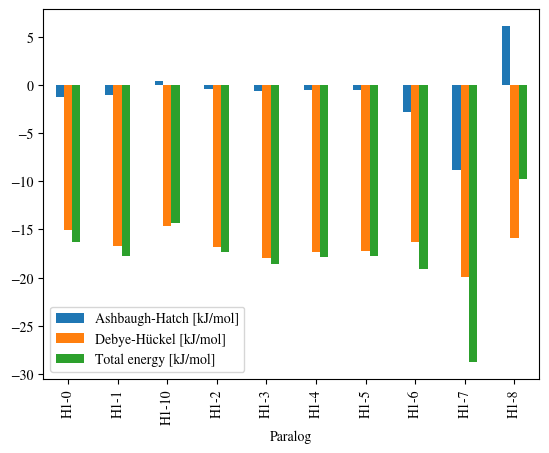

In [16]:
# Checking mean interaction energies
data[data['Minimum interresidue distance [nm]'] < 4].groupby('Paralog')[['Ashbaugh-Hatch [kJ/mol]', 'Debye-Hückel [kJ/mol]', 'Total energy [kJ/mol]']].mean().plot.bar()

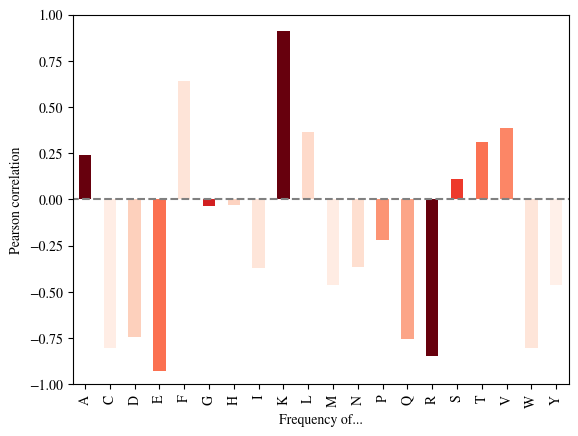

In [9]:
# Checking correlation with content coloured by variation
analyse_utils.amino_acid_content(metadata.sequence).corrwith(np.log10(Kds.Kd)).plot.bar(color=plt.cm.Reds(analyse_utils.amino_acid_content(metadata.sequence).std()/0.05))
plt.ylim(-1,1)
plt.ylabel("Pearson correlation")
plt.xlabel("Frequency of...")
plt.hlines(0,-1,20,color='grey',linestyles='--')

<Axes: >

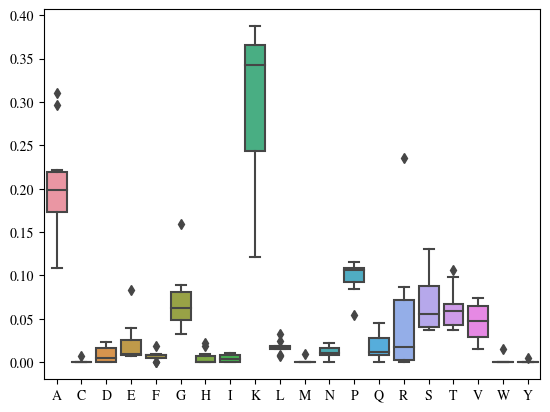

In [85]:
# Plotting distribution of content
sns.boxplot(analyse_utils.amino_acid_content(metadata.sequence))

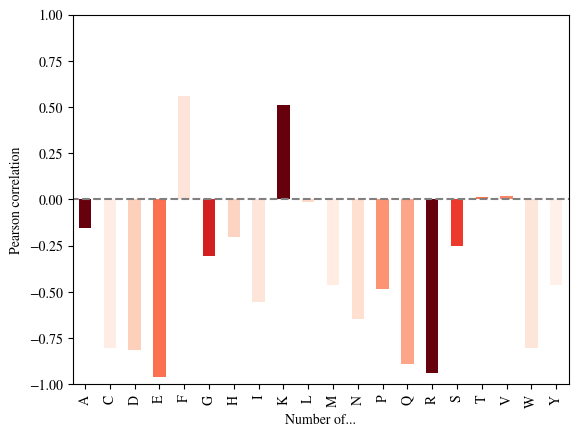

In [10]:
# Checking correlation with number content
(analyse_utils.amino_acid_content(metadata.sequence).multiply(metadata.sequence.apply(len), axis=0)).corrwith(np.log10(Kds.Kd)).plot.bar(color=plt.cm.Reds(analyse_utils.amino_acid_content(metadata.sequence).std()/0.05))
plt.ylim(-1,1)
plt.ylabel("Pearson correlation")
plt.xlabel("Number of...")
plt.hlines(0,-1,20,color='grey',linestyles='--')

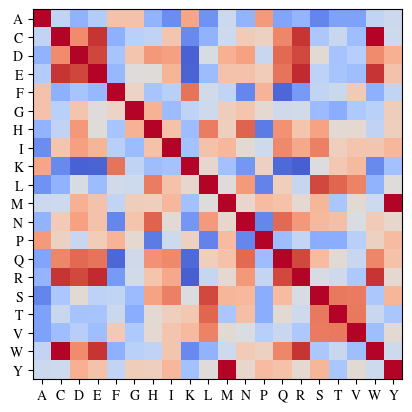

In [66]:
plt.imshow(analyse_utils.amino_acid_content(metadata.sequence).corr(), vmin=-1, vmax=1, cmap='coolwarm')
plt.xticks(np.linspace(0,19,20), labels=analyse_utils.amino_acids)
plt.yticks(np.linspace(0,19,20), labels=analyse_utils.amino_acids)
plt.show()

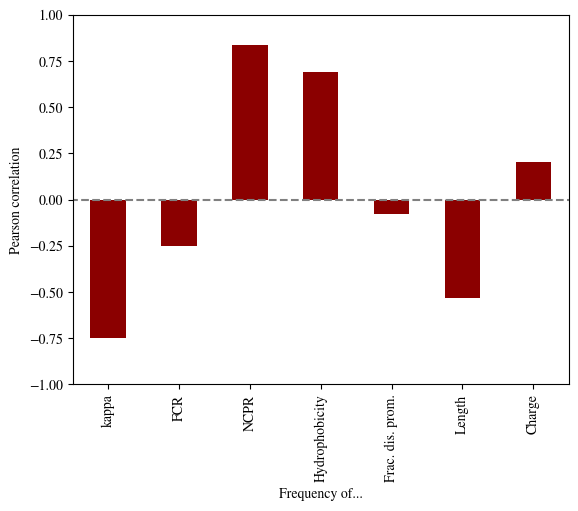

In [16]:
# Checking correlation with cider
cider.corrwith(np.log10(Kds.Kd)).plot.bar(color='darkred')
plt.ylim(-1,1)
plt.ylabel("Pearson correlation")
plt.xlabel("Frequency of...")
plt.hlines(0,-1,20,color='grey',linestyles='--')